In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure 

keras = tf.keras

from sklearn.metrics import mean_squared_error, mean_absolute_error

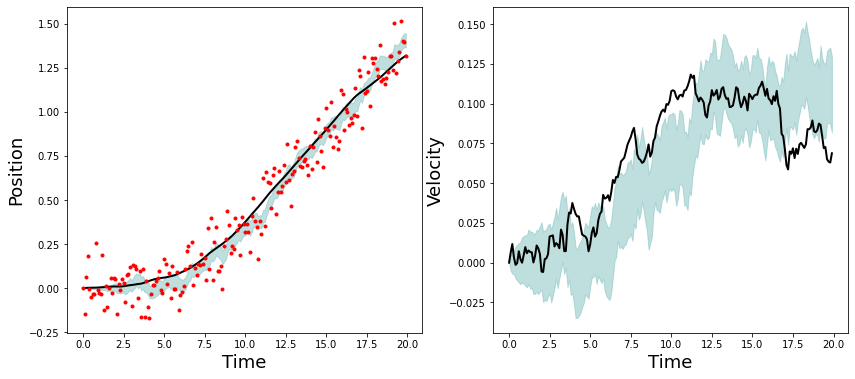

In [91]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

x0 = [[0],[0]]
P0 = [[0, 0], [0, 0]]
dt = 0.1
sigma_a = 0.05
sigma_z = 0.1

#tf.reset_default_graph()

with tf.compat.v1.variable_scope('constants'):
    F = tf.constant([[1, dt],[0, 1]], dtype=tf.float32)
    G = tf.constant([[dt**2/2], [dt]], dtype=tf.float32)
    Q = tf.matmul(G, G, transpose_b=True) * sigma_a**2
    H = tf.constant([[1,0]], dtype=tf.float32)
    R = tf.constant(sigma_z**2, dtype=tf.float32)

with tf.compat.v1.variable_scope('model'):
    with tf.compat.v1.variable_scope('state'):
        x = tf.Variable(x0, dtype=tf.float32)
    
    with tf.compat.v1.variable_scope('noise'):
        w = G*tf.compat.v1.random_normal([1], mean=0, stddev=sigma_a)
        
    with tf.compat.v1.variable_scope('update_model'):
        update_model = x.assign(tf.matmul(F,x) + w)
    
with tf.compat.v1.variable_scope('observation'):
    v = tf.compat.v1.random_normal([1], mean=0, stddev=sigma_z)
    z = tf.matmul(H,x) + v

with tf.compat.v1.variable_scope('kalman_filter'):
    with tf.compat.v1.variable_scope('model_estimate'):
        xhat = tf.Variable(x0, dtype=tf.float32)
        P = tf.Variable(P0, dtype=tf.float32)

    with tf.compat.v1.variable_scope('predict'):
        predict_xhat = xhat.assign(tf.matmul(F,xhat))
        predict_P = P.assign(tf.matmul(F,tf.matmul(P,F, transpose_b=True)) + Q)
        
    with tf.compat.v1.variable_scope('update_estimation'):
        y1 = z - tf.matmul(H,xhat)
        S = R + tf.matmul(H,tf.matmul(P,H, transpose_b=True))
        K = tf.matmul(tf.matmul(P,H, transpose_b=True) , tf.linalg.inv(S))
        update_xhat = tf.compat.v1.assign_add(xhat, tf.matmul(K,y1))
        delta_P = tf.matmul(K,tf.matmul(H,P))
        update_P = tf.compat.v1.assign_sub(P, delta_P)
        y2 = z - tf.matmul(H,xhat)
    
with tf.compat.v1.Session() as sess:    
    sess.run(tf.compat.v1.global_variables_initializer())
    #summary_writer = tf.summary.FileWriter('logdir/', sess.graph)
    
    N = 200

    t = [i*dt for i in range(N)]
    model = np.array([x0]*N, dtype=np.float32)
    estimate1 = np.array([x0]*N, dtype=np.float32)
    error1 = np.array([P0]*N, dtype=np.float32)
    estimate2 = np.array([x0]*N, dtype=np.float32)
    error2 = np.array([P0]*N, dtype=np.float32)
    observations = np.array([0]*N, dtype=np.float32)
    for i in range(1,N):
        model[i], estimate1[i] , error1[i], estimate2[i], error2[i], observations[i] = sess.run([update_model, predict_xhat, predict_P, update_xhat, update_P, z])

#plot

plt.figure(num=None, figsize=(14, 6))

plt.subplot(1, 2, 1)

plt.fill_between(t,estimate2[:,0,0]+np.sqrt(error2[:,0,0]),estimate2[:,0,0]-np.sqrt(error2[:,0,0]), color = [0.5,0.75,0.75,.5])
plt.plot(t, model[:,0,0],  color='k', linewidth=2.0)
plt.plot(t, observations, color='r', marker='.', linestyle='None')

plt.ylabel('Position', fontsize=18)
plt.xlabel('Time', fontsize=18)

plt.subplot(1, 2, 2)
plt.fill_between(t,estimate2[:,1,0]+np.sqrt(error2[:,1,1]),estimate2[:,1,0]-np.sqrt(error2[:,1,1]), color = [0.5,0.75,0.75,.5])
plt.plot(t, model[:,1,0],  color='k', linewidth=2.0)

plt.ylabel('Velocity', fontsize=18)
plt.xlabel('Time', fontsize=18)

plt.savefig('simple.png')

In [90]:
len(t)

200